# SVM on Anuran


## Import packages

In [1]:
import csv
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score


## Load dataset

In [2]:
df_train = pd.read_csv("Frogs_MFCCs.csv")                         # importing dataset with pandas

In [3]:
df_train.info()                                              # more information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MFCCs_ 1  7195 non-null   float64
 1   MFCCs_ 2  7195 non-null   float64
 2   MFCCs_ 3  7195 non-null   float64
 3   MFCCs_ 4  7195 non-null   float64
 4   MFCCs_ 5  7195 non-null   float64
 5   MFCCs_ 6  7195 non-null   float64
 6   MFCCs_ 7  7195 non-null   float64
 7   MFCCs_ 8  7195 non-null   float64
 8   MFCCs_ 9  7195 non-null   float64
 9   MFCCs_10  7195 non-null   float64
 10  MFCCs_11  7195 non-null   float64
 11  MFCCs_12  7195 non-null   float64
 12  MFCCs_13  7195 non-null   float64
 13  MFCCs_14  7195 non-null   float64
 14  MFCCs_15  7195 non-null   float64
 15  MFCCs_16  7195 non-null   float64
 16  MFCCs_17  7195 non-null   float64
 17  MFCCs_18  7195 non-null   float64
 18  MFCCs_19  7195 non-null   float64
 19  MFCCs_20  7195 non-null   float64
 20  MFCCs_21  7195 non-null   floa

## Part one

In [ ]:
train, test = train_test_split(df_train, test_size=0.3)

In [ ]:
y_train = train["Family"]
train = train.loc[:, train.columns != 'Family']
train = train.loc[:, train.columns != 'Genus']
train = train.loc[:, train.columns != 'Species']
x_train = train.loc[:, train.columns != 'RecordID']

y_test = test["Family"]
test = test.loc[:, test.columns != 'Family']
test = test.loc[:, test.columns != 'Genus']
test = test.loc[:, test.columns != 'Species']
x_test = test.loc[:, test.columns != 'RecordID']


In [ ]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
lsvc = SVC(C=1,random_state=42,kernel="linear")
lsvc.fit(x_train,y_train)
score = lsvc.score(x_train,y_train)
print("score: ",score)

score:  0.9539316918189039


In [ ]:
y_pred_test = lsvc.predict(x_test)
y_pred_train = lsvc.predict(x_train)

print("Test accuracy score: {0:0.4f}".format(accuracy_score(y_test,y_pred_test)))
print("Train accuracy score: {0:0.4f}".format(accuracy_score(y_train,y_pred_train)))
print("number of support vectors: {}".format(lsvc._n_support))

Test accuracy score: 0.9551
Train accuracy score: 0.9539
number of support vectors: [ 28  92 327 297]


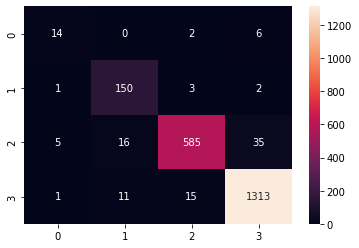

In [ ]:
cm = confusion_matrix(y_test,y_pred_test)
cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix,annot=True,fmt="d")

## Part Two

In [4]:
train1, test = train_test_split(df_train, test_size=0.15)
train, valid = train_test_split(train1, test_size=0.15)

In [5]:
y_train = train["Family"]
train = train.loc[:, train.columns != 'Family']
train = train.loc[:, train.columns != 'Genus']
train = train.loc[:, train.columns != 'Species']
x_train = train.loc[:, train.columns != 'RecordID']

y_test = test["Family"]
test = test.loc[:, test.columns != 'Family']
test = test.loc[:, test.columns != 'Genus']
test = test.loc[:, test.columns != 'Species']
x_test = test.loc[:, test.columns != 'RecordID']

y_valid = valid["Family"]
valid = valid.loc[:, valid.columns != 'Family']
valid = valid.loc[:, valid.columns != 'Genus']
valid = valid.loc[:, valid.columns != 'Species']
x_valid = valid.loc[:, valid.columns != 'RecordID']


In [6]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [7]:
scores = []
max = 0
c_best = 1
ran = range(1,100)
for i in ran:
  rsvc = SVC(C=i,random_state=42,kernel="rbf")
  rsvc.fit(x_train,y_train)
  score = rsvc.score(x_valid,y_valid)
  scores.append(score)
  if score>max :
    max = score
    c_best = i
print("max_accuracy: ",max)
print("best_C: ",c_best)

max_accuracy:  0.9978213507625272
best_C:  8


<function matplotlib.pyplot.show(*args, **kw)>

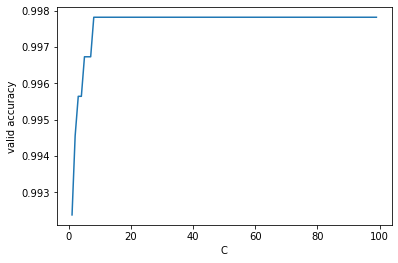

In [8]:
plt.plot(ran,scores)
plt.xlabel('C')
plt.ylabel('valid accuracy')
plt.show

In [9]:
rsvc = SVC(C=c_best,random_state=42,kernel="rbf")
rsvc.fit(x_train,y_train)
score_train = rsvc.score(x_train,y_train)
score_test = rsvc.score(x_test,y_test)

y_pred_test = rsvc.predict(x_test)
y_pred_train = rsvc.predict(x_train)

print("Test accuracy score: {0:0.4f}".format(accuracy_score(y_test,y_pred_test)))
print("Train accuracy score: {0:0.4f}".format(accuracy_score(y_train,y_pred_train)))
print("number of support vectors: {}".format(rsvc._n_support))

Test accuracy score: 0.9889
Train accuracy score: 1.0000
number of support vectors: [ 17  60 222 174]


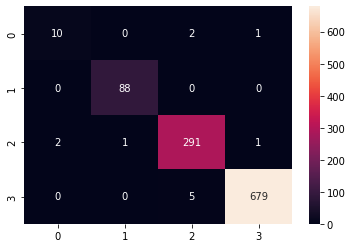

In [10]:
cm = confusion_matrix(y_test,y_pred_test)
cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix,annot=True,fmt="d")

## Part Three

In [11]:
rsvc = SVC(C=1,random_state=42,kernel="rbf")
rsvc.fit(x_train,y_train)
score_rbf = rsvc.score(x_valid,y_valid)

psvc = SVC(C=1,random_state=42,kernel="poly")
psvc.fit(x_train,y_train)
score_poly = psvc.score(x_valid,y_valid)

if score_rbf>score_poly:
  best_kernel = "rbf"
  max_accuracy = score_rbf
else:
  best_kernel = "poly"
  max_accuracy = score_poly

print("max_accuracy: ",max_accuracy)
print("best_kernel: ",best_kernel)

max_accuracy:  0.9923747276688453
best_kernel:  rbf


In [12]:
clf = SVC(C=1,random_state=42,kernel=best_kernel)
clf.fit(x_train,y_train)
score_train = clf.score(x_train,y_train)
score_test = clf.score(x_test,y_test)

y_pred_test = clf.predict(x_test)
y_pred_train = clf.predict(x_train)

print("Test accuracy score: {0:0.4f}".format(accuracy_score(y_test,y_pred_test)))
print("Train accuracy score: {0:0.4f}".format(accuracy_score(y_train,y_pred_train)))
print("number of support vectors: {}".format(clf._n_support))

Test accuracy score: 0.9870
Train accuracy score: 0.9950
number of support vectors: [ 37  88 289 211]


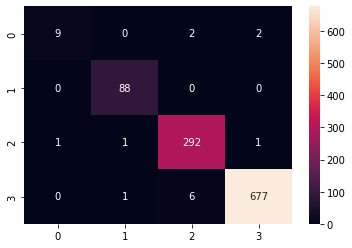

In [13]:
cm = confusion_matrix(y_test,y_pred_test)
cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix,annot=True,fmt="d")

## Part Four

In [14]:
scores = []
max = 0
c_best = 1
ran = range(1,100)
for i in ran:
  model = SVC(C=i,random_state=42,kernel=best_kernel)
  model.fit(x_train,y_train)
  score = model.score(x_valid,y_valid)
  scores.append(score)
  if score>max :
    max = score
    c_best = i
print("max_accuracy: ",max)
print("best_C: ",c_best)

max_accuracy:  0.9978213507625272
best_C:  8


<function matplotlib.pyplot.show(*args, **kw)>

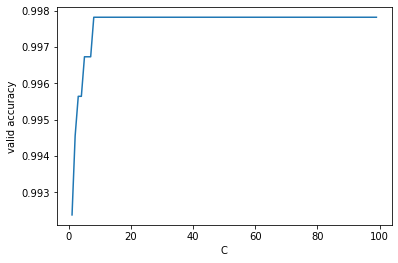

In [15]:
plt.plot(ran,scores)
plt.xlabel('C')
plt.ylabel('valid accuracy')
plt.show

In [16]:
model = SVC(C=c_best,random_state=42,kernel=best_kernel)
model.fit(x_train,y_train)
score_train = model.score(x_train,y_train)
score_test = model.score(x_test,y_test)

y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

print("Test accuracy score: {0:0.4f}".format(accuracy_score(y_test,y_pred_test)))
print("Train accuracy score: {0:0.4f}".format(accuracy_score(y_train,y_pred_train)))
print("number of support vectors: {}".format(model._n_support))

Test accuracy score: 0.9889
Train accuracy score: 1.0000
number of support vectors: [ 17  60 222 174]


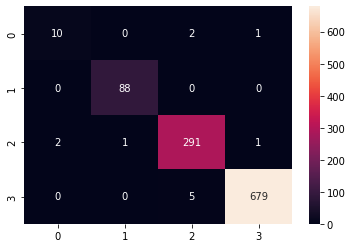

In [17]:
cm = confusion_matrix(y_test,y_pred_test)
cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix,annot=True,fmt="d")

## Part Five

In [18]:
train, test = train_test_split(df_train, test_size=0.2)

In [19]:
y_train = train["Family"]
train = train.loc[:, train.columns != 'Family']
train = train.loc[:, train.columns != 'Genus']
train = train.loc[:, train.columns != 'Species']
x_train = train.loc[:, train.columns != 'RecordID']

y_test = test["Family"]
test = test.loc[:, test.columns != 'Family']
test = test.loc[:, test.columns != 'Genus']
test = test.loc[:, test.columns != 'Species']
x_test = test.loc[:, test.columns != 'RecordID']


In [20]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
scores = []
max = 0
c_best = 1
ran = range(1,100)
for i in ran:
  model2 = SVC(C=i,random_state=42,kernel=best_kernel)
  cv_scores = cross_val_score(model2,x_train,y_train,cv=4)
  score = cv_scores.mean()
  scores.append(score)
  if score>max :
    max = score
    c_best = i
print("max_accuracy: ",max)
print("best_C: ",c_best)

max_accuracy:  0.9923558026407228
best_C:  17


<function matplotlib.pyplot.show(*args, **kw)>

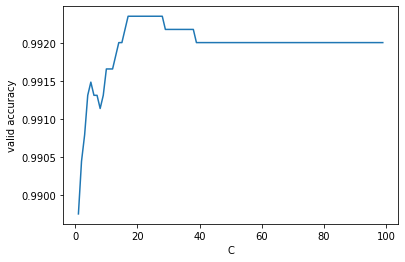

In [22]:
plt.plot(ran,scores)
plt.xlabel('C')
plt.ylabel('valid accuracy')
plt.show

In [23]:
svm = SVC(C=c_best,random_state=42,kernel=best_kernel)
svm.fit(x_train,y_train)
score_train = svm.score(x_train,y_train)
score_test = svm.score(x_test,y_test)

y_pred_test = svm.predict(x_test)
y_pred_train = svm.predict(x_train)

print("Test accuracy score: {0:0.4f}".format(accuracy_score(y_test,y_pred_test)))
print("Train accuracy score: {0:0.4f}".format(accuracy_score(y_train,y_pred_train)))
print("number of support vectors: {}".format(svm._n_support))

Test accuracy score: 0.9889
Train accuracy score: 1.0000
number of support vectors: [ 18  57 232 172]


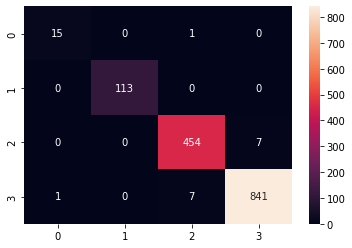

In [24]:
cm = confusion_matrix(y_test,y_pred_test)
cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix,annot=True,fmt="d")